# data processing 


This is a data processing part, merging version 1 data exploration and version 10 of feature editing

Some methods and codes of this version of preprocessing and modeling are from the following works
1. kaggle website ML from start to finish with sk-learn https://www.kaggle.com/kernels/scriptcontent/320209/output and
2. make-your-first-sub-Daniel-Bourke https://github.com/mrdbourke/your-first-kaggle-submission
3. In-Depth Visualisations - Simple Methods https://www.kaggle.com/kernels/scriptcontent/6824709/notebook

Major modification of features

selected features: pclass, parch, scisp, sex, fare, age, embark
created features: ischild (from age)
one_hot features: pclass, sex
dropped features: name (last name, prefix), ticket, cabnet(lack of data),
this version leave Fare and age as it is, but still create Ischild

fill in the missing master age as 6

simplify age and fare, remove bin

edit embarked, fill in 'C'

introduced normalization of Fare and age

ML method: catboost


## Setup

In [56]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import missingno





# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

## Loading data



In [57]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [58]:
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Master. Sigvard Harald Elias",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [61]:
pandas_profiling.ProfileReport(test)

Number of variables,11
Number of observations,418
Total Missing (%),9.0%
Total size in memory,36.0 KiB
Average record size in memory,88.2 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,0


## Check missing data



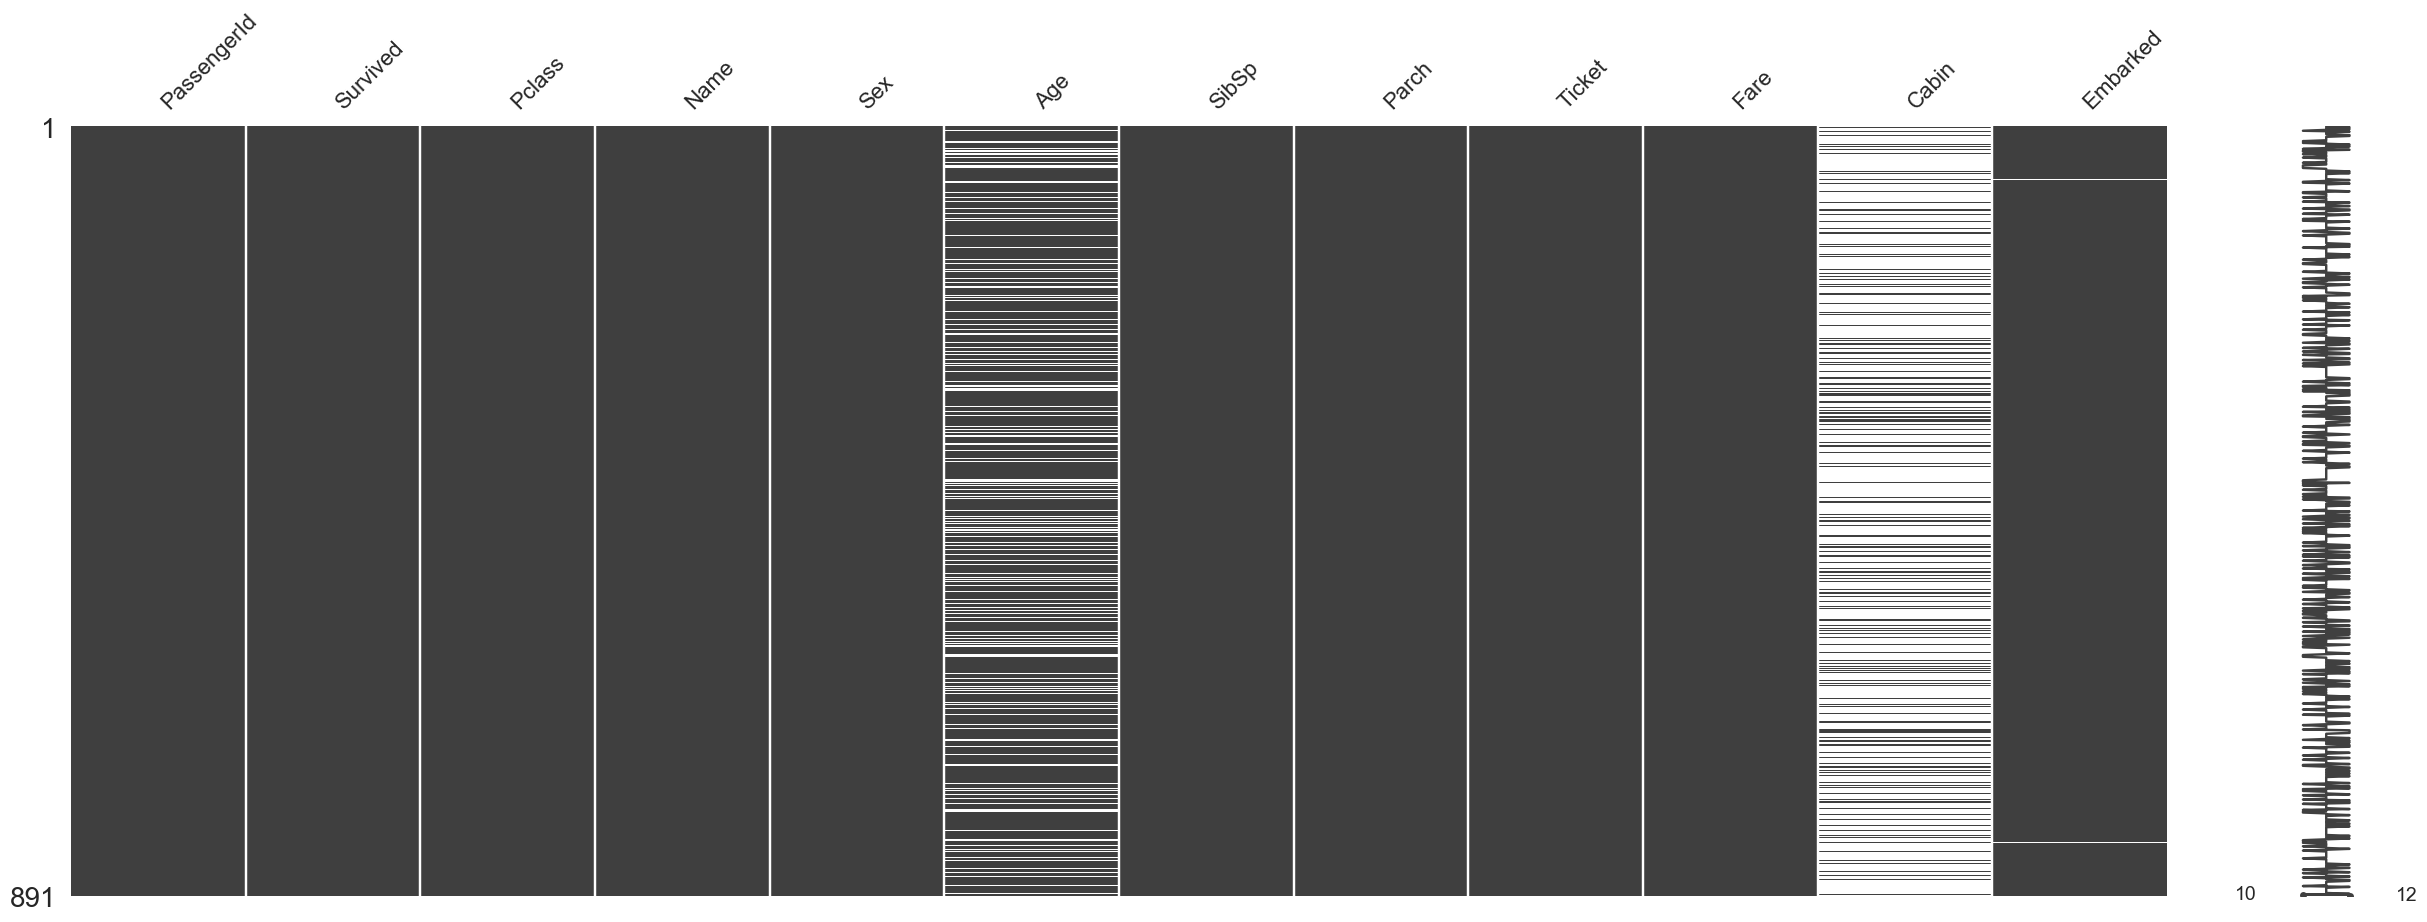

In [62]:
missingno.matrix(train, figsize = (30,10))

In [63]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


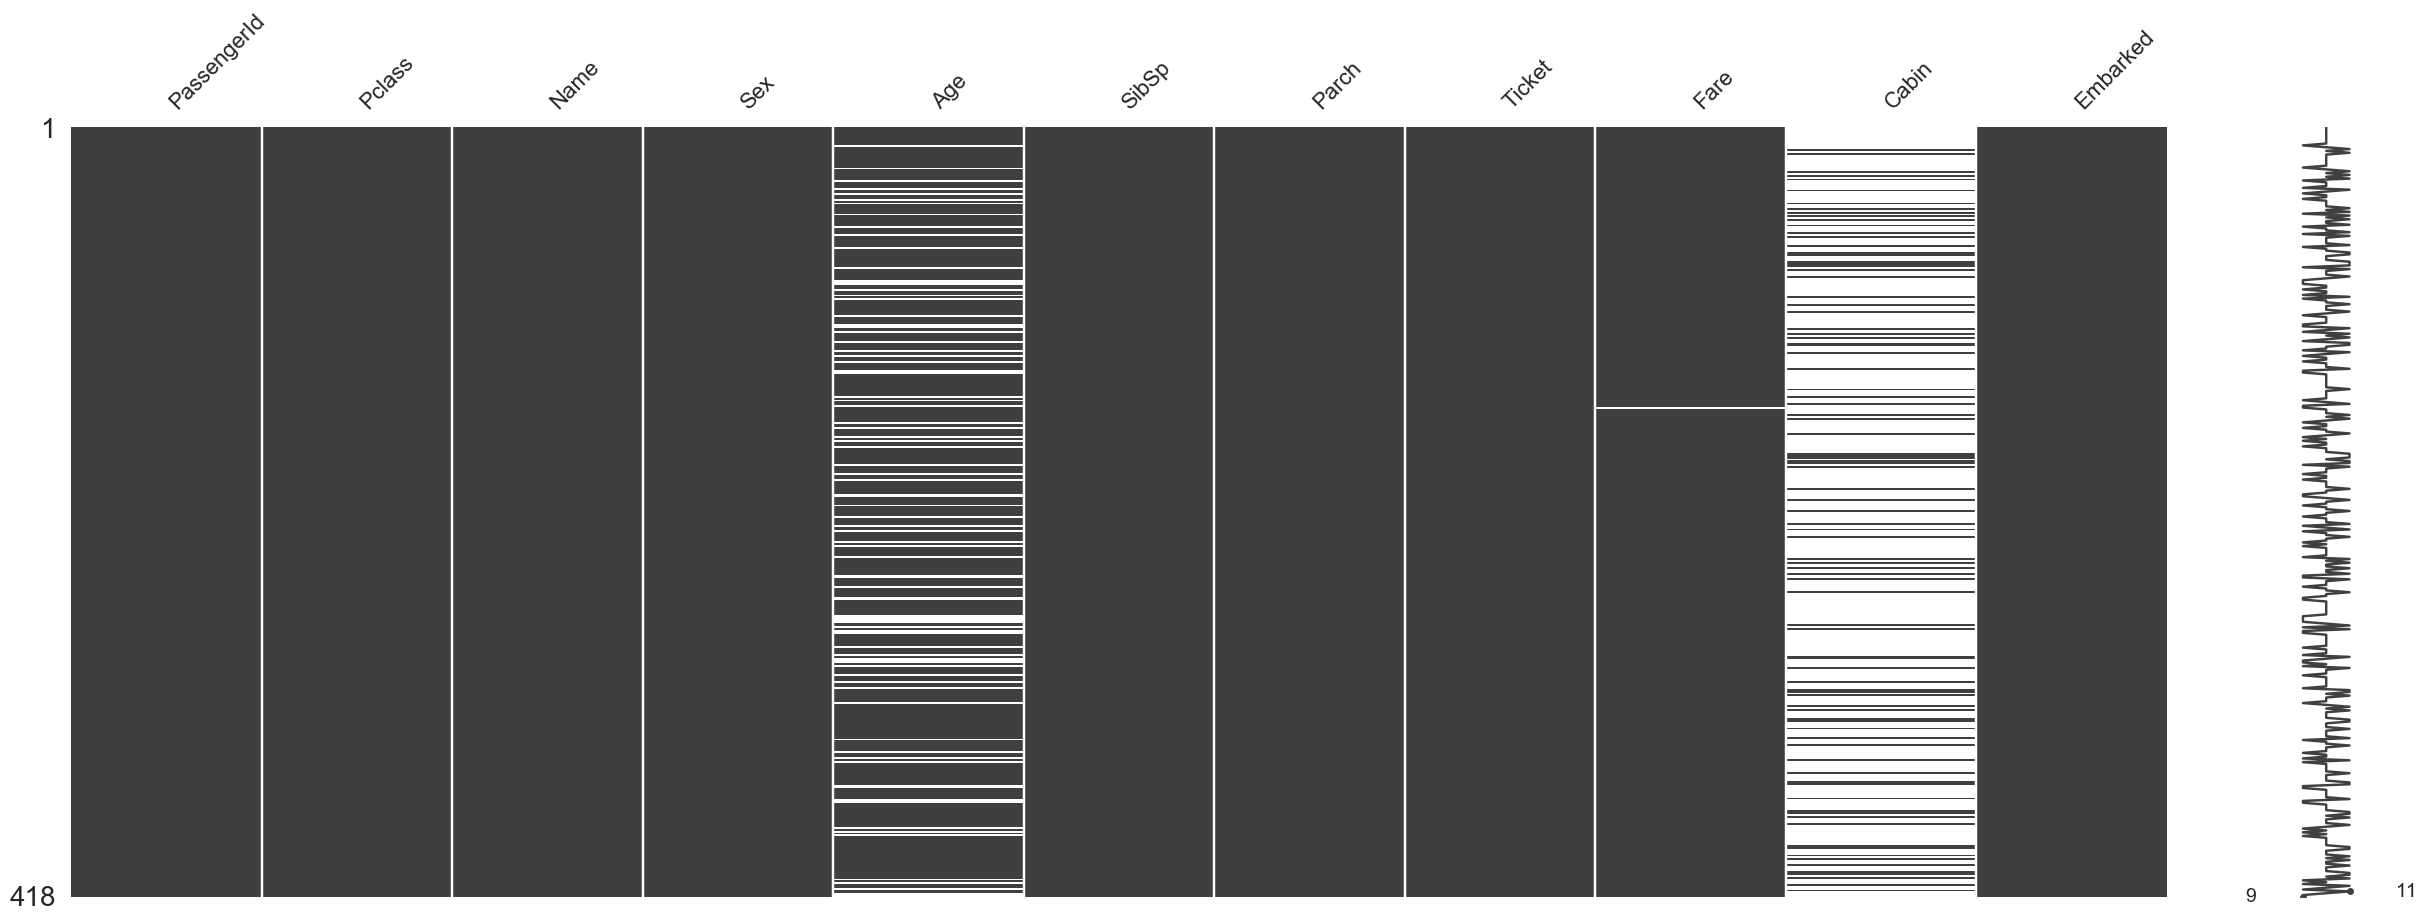

In [66]:
missingno.matrix(test, figsize = (30,10))

In [67]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Features

...

In [68]:
train['Died'] = 1 - train['Survived']


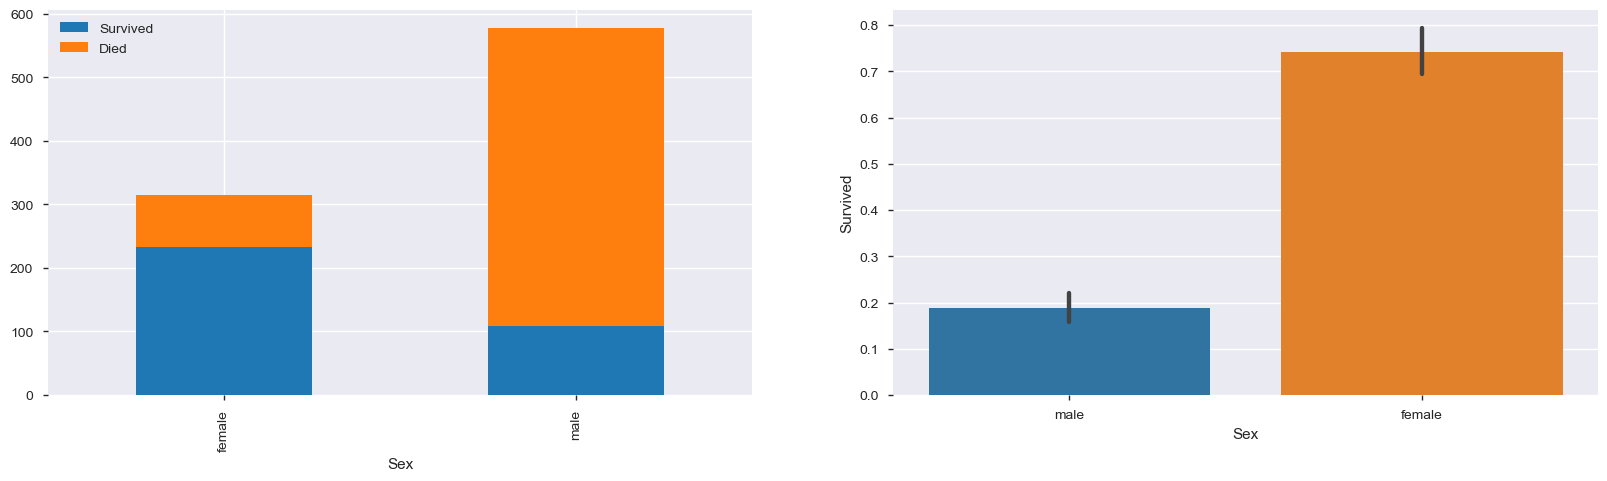

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                          stacked=True,ax=ax[0])
sns.barplot(x="Sex", y="Survived", data=train, ax=ax[1])

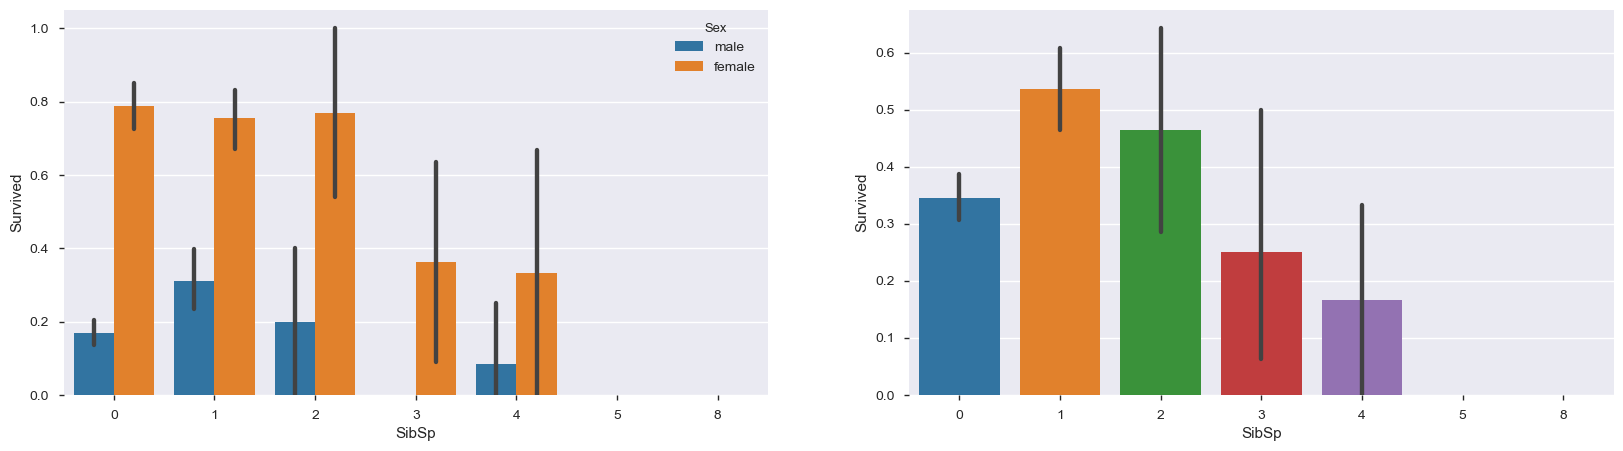

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="SibSp", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="SibSp", y="Survived", data=train, ax=ax[1])

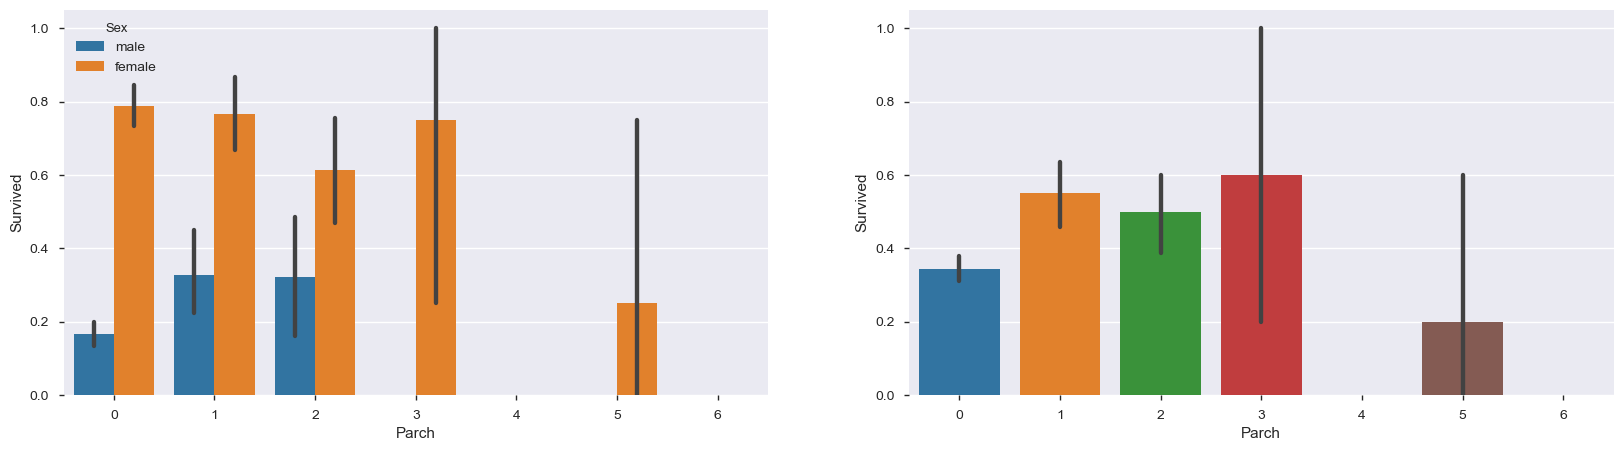

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Parch", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Parch", y="Survived", data=train, ax=ax[1])

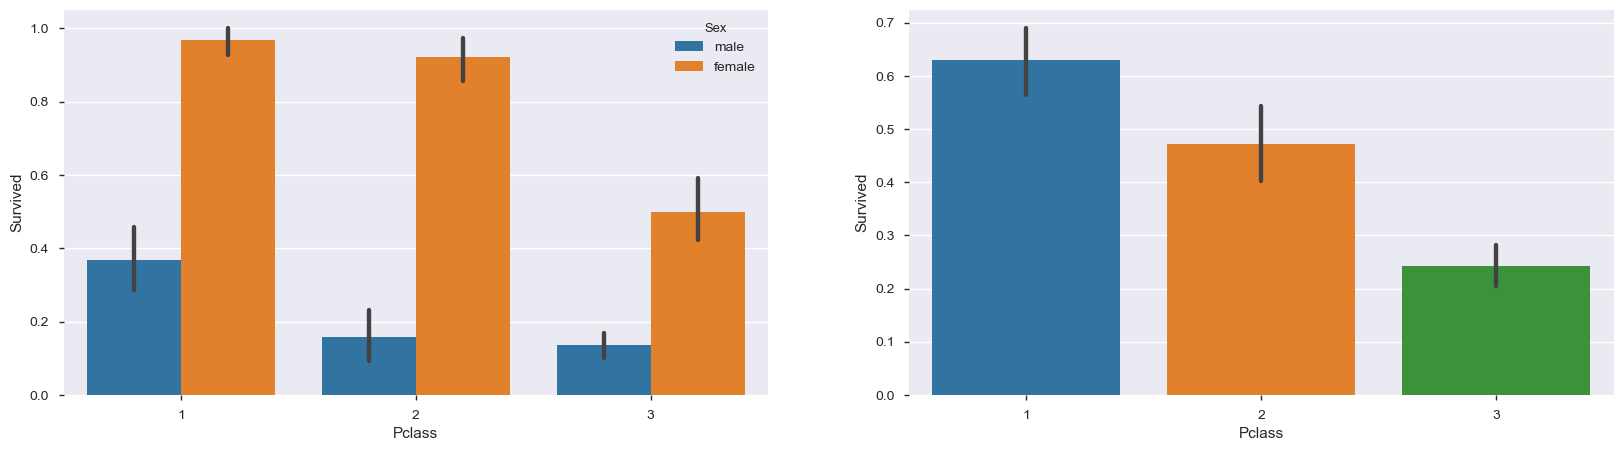

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Pclass", y="Survived", data=train, ax=ax[1])

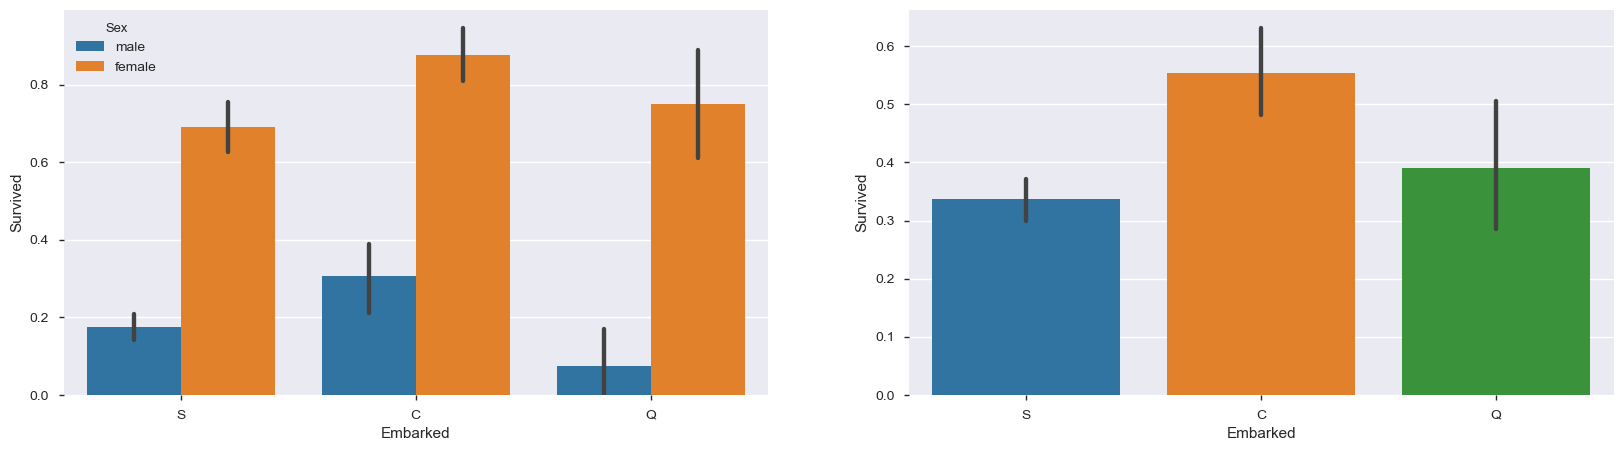

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Embarked", y="Survived", data=train, ax=ax[1])

In [74]:
train[train.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


## Comment on features
 
...



## Transforming Features


PassengerId      int64

Survived         int64  0 = No, 1 = Yes

------------------------
keep

Pclass           int64  --> one hot enc

Sex             object   --> one hot enc

Age            float64  --> ischild --> one hot enc   fill in missing value in non-child bins.

SibSp            int64

Parch            int64





-------------------------------
drop

Name            object

Ticket          object

Cabin           object

Embarked        object



Fare           float64   -->  Fare_tier 3  --> one hot enc,  1 missing value in test set


In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### creat 'isfemale' feature

In [76]:
train['Isfemale'] = np.where(train.Sex == 'female', 1, 0)
test['Isfemale'] = np.where(test.Sex == 'female', 1, 0)

### creat 'isfemale' feature

In [77]:
train['Ismaster'] = np.where(train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) == 'Master', 1, 0)

test['Ismaster'] = np.where(test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) == 'Master', 1, 0)

In [78]:
train[['Ismaster','Age','Sex','Survived']].loc[train.Ismaster==1,:].loc[train.Age.isna(),:]

,Ismaster,Age,Sex,Survived
65,1,NaN,male,1
159,1,NaN,male,0
176,1,NaN,male,0
709,1,NaN,male,1


In [79]:
train_master_nas = np.isnan(train.Age) & (train.Ismaster==1)
train_master_nas[train_master_nas == True]

65     True
159    True
176    True
709    True
dtype: bool

In [80]:
test[['PassengerId','Ismaster','Age','Sex']].loc[test.Ismaster==1,:].loc[test.Age.isna(),:]

,PassengerId,Ismaster,Age,Sex
244,1136,1,NaN,male
339,1231,1,NaN,male
344,1236,1,NaN,male
417,1309,1,NaN,male


In [81]:
test_master_nas = np.isnan(test.Age) & (test.Ismaster==1)
test_master_nas[test_master_nas == True]

244    True
339    True
344    True
417    True
dtype: bool

In [82]:
# the age group will be seperated into only two, child or not. 0-12 is consided child. 
# fill age with a distribution
train['Age_fill'] = train['Age']
ages = train['Age_fill'].dropna()
std_ages = ages.std()
mean_ages = ages.mean()

train_nas = np.isnan(train["Age_fill"])

np.random.seed(122)

impute_age_train  = np.random.randint(mean_ages - std_ages, mean_ages + std_ages, size = train_nas.sum())

train["Age_fill"][train_nas] = impute_age_train

train_master_nas = np.isnan(train.Age) & (train.Ismaster==1)

train["Age_fill"][train_master_nas] = 6.0                 # correct age of the known "master" aka boys that was NaN



test['Age_fill'] = test['Age']

test_nas = np.isnan(test["Age_fill"])

impute_age_test  = np.random.randint(mean_ages - std_ages, mean_ages + std_ages, size = test_nas.sum())

test["Age_fill"][test_nas] = impute_age_test # fill in distribution

test_master_nas = np.isnan(test.Age) & (test.Ismaster==1)

test["Age_fill"][test_master_nas] = 6.0                 # correct age of the known "master" aka boys that was NaN


In [83]:
train.Age_fill[train.Age_fill ==6.0]

65     6.0
159    6.0
176    6.0
709    6.0
720    6.0
751    6.0
813    6.0
Name: Age_fill, dtype: float64

In [84]:
test.Age_fill[test.Age_fill ==6.0]

80     6.0
196    6.0
244    6.0
339    6.0
344    6.0
389    6.0
417    6.0
Name: Age_fill, dtype: float64

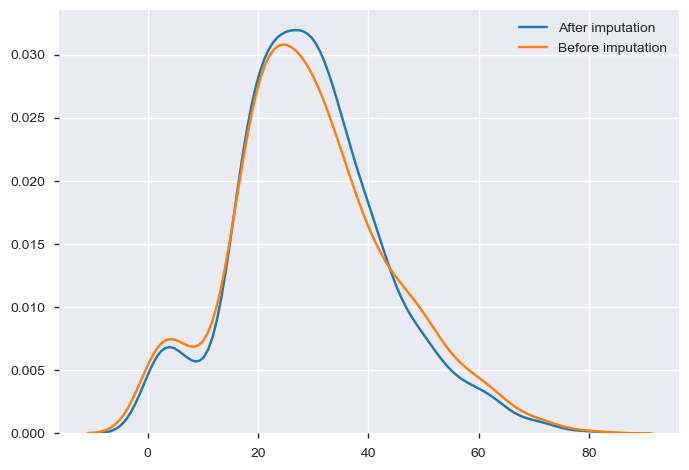

In [85]:
sns.kdeplot(train.Age_fill, label = 'After imputation');
sns.kdeplot(ages, label = 'Before imputation');

### fare

In [86]:
#Fare

# train set
train['Fare_fill'] = train.Fare



# test set
test['Fare_fill'] = test.Fare.fillna(5)  # only one missing value, so fill in the most likely bin


### pclass

In [87]:
train_Plcass_one_hot = pd.get_dummies(train['Pclass'], 
                                   prefix='Pclass')
test_Plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='Pclass')

In [88]:
train.Embarked=train.Embarked.fillna('C')
train_Embarked_one_hot = pd.get_dummies(train['Embarked'], 
                                   prefix='Embarked')

test.Embarked=test.Embarked.fillna('C')
test_Embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                   prefix='Embarked')

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Isfemale,Ismaster,Age_fill,Fare_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,35.0,8.0500


## Correlation of the features

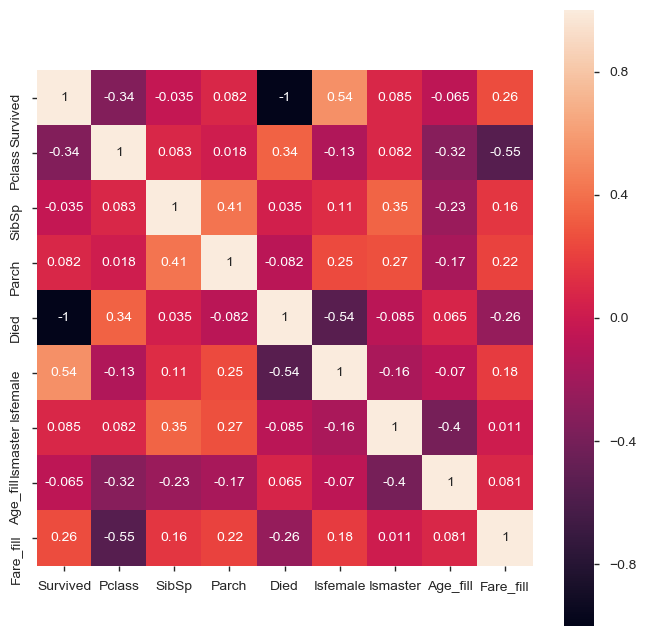

In [90]:
plt.figure(figsize=(8, 8))
corrmap = sns.heatmap(train.drop(['PassengerId','Name', 'Sex', 'Age','Fare',  'Ticket', 'Cabin'],axis=1).corr(), square=True, annot=True)

## Drop excluded and junk features

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Isfemale,Ismaster,Age_fill,Fare_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,35.0,8.0500


In [92]:
drop_list =['Pclass', 'Sex', 'Age',  'Ismaster',  'Fare',  'Ticket', 'Name', 'Embarked', 'Cabin']

df_train = train.drop(drop_list+['Died'], axis=1)

df_test = test.drop(drop_list, axis=1)

In [93]:
df_train = pd.concat([df_train,
                      train_Embarked_one_hot,
                        train_Plcass_one_hot
                       ], axis=1)

df_test = pd.concat([df_test,
                      test_Embarked_one_hot,
                      test_Plcass_one_hot
                        ], axis=1)

In [97]:
#normalize columns, set mean =1, min =0
def normalized(data,columns):
    for column in columns:
        data[column] = (data[column]-data[column].min())/(data[column].mean()-data[column].min())

In [98]:
normalized(df_train, ['Fare_fill','Age_fill','Parch'] )
normalized(df_test, ['Fare_fill','Age_fill','Parch'] )

In [99]:
df_train.head()

,PassengerId,Survived,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0.0,0,0.741556,0.225126,0,0,1,0,0,1
1,2,1,1,0.0,1,1.291367,2.213478,1,0,0,1,0,0
2,3,1,0,0.0,1,0.879009,0.246086,0,0,1,0,0,1
3,4,1,1,0.0,1,1.188277,1.648853,0,0,1,1,0,0
4,5,0,0,0.0,0,1.188277,0.249967,0,0,1,0,0,1


In [100]:
df_test.head()

,PassengerId,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,0.00000,0,1.175411,0.220206,0,1,0,0,0,1
1,893,1,0.00000,1,1.603394,0.196884,0,0,1,0,0,1
2,894,0,0.00000,0,2.116973,0.272473,0,1,0,0,1,0
3,895,0,0.00000,0,0.918622,0.243644,0,0,1,0,0,1
4,896,1,2.54878,1,0.747429,0.345602,0,0,1,0,0,1


# save data

In [101]:
df_train.to_csv('data/df_train_v10.csv', index = False)
df_test.to_csv('data/df_test_v10.csv', index = False)